In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from mtcnn import MTCNN
import cv2
from matplotlib import gridspec

In [3]:
file = "Desktop/AI_KASHIR/"

In [6]:
X = []
y = []
i = 0
n = 100
size = (160,160)

In [7]:
while(i != n):
    path = "Profile_id"+str(i)+".png"
    file_path = file + path
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    X.append(img)
    y.append(i)
    i+=1

In [8]:
len(X)

100

In [9]:
len(y)

100

([], <a list of 0 Text yticklabel objects>)

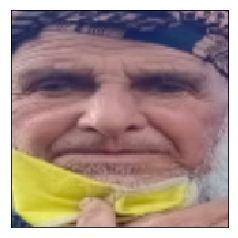

In [11]:
plt.imshow(X[0])
plt.xticks([])
plt.yticks([])

In [18]:
model = load_model("Desktop/facenet_keras.h5/model/facenet_keras.h5")
print('Loaded Model')

Instructions for updating:
Colocations handled automatically by placer.
Loaded Model


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [19]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

In [25]:
new_X = []
new_y = []
for i in range(len(X)):
    new_X.append(get_embedding(model, X[i]))
    if(i%10 == 0):
        print("=", end = "")

In [46]:
X_fit = new_X[0:60]
y_fit = y[0:60]

In [47]:
len(X_fit)

60

In [48]:
X_partial = new_X[60:100]
y_partial = y[60:100]

In [49]:
len(X_partial)

40

In [50]:
np.shape(new_X)

(100, 128)

In [51]:
X_fit = np.array(X_fit)
X_partial = np.array(X_partial)
y_fit = np.array(y_fit)
y_partial = np.array(y_partial)

In [52]:
print(X_fit.shape)
print(y_fit.shape)

(60, 128)
(60,)


In [102]:
svc = SGDClassifier(loss = "hinge", penalty="l2", max_iter= 1000, shuffle= True)

In [103]:
svc.fit(X_fit, y_fit)

SGDClassifier()

In [55]:
svc.predict(X_fit)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [66]:
svc.decision_function(X_fit)[4]  # class 4 is +ve hence that is what model is predicting

array([ -557.77763387,  -586.18344583,  -880.75163856,  -947.74144845,
          35.35249126,  -786.62450755,  -740.22040871,  -773.45827403,
       -1080.72604955,  -766.80876322,  -534.69727702, -1049.63170535,
        -835.6747068 ,  -974.96470783,  -903.23573779,  -549.02253478,
        -369.71683581,  -794.69709423,  -541.86189783,  -385.6890774 ,
       -1170.64719237,  -691.96908665,  -685.36329385,  -353.34142863,
        -769.54511942,  -459.76107029,  -843.78514116,  -629.03102567,
        -632.11487294, -1083.32292065, -1263.0144621 ,  -848.25384746,
        -733.63170177,  -943.21875894, -1046.18440748, -1005.21845097,
        -987.36656259,  -723.72880453,  -751.26310217,  -793.54952861,
       -1224.2624234 ,  -794.0166116 , -1276.0531115 ,  -744.89220019,
        -672.68131437,  -808.30732273,  -575.27195313,  -700.19964932,
        -707.0777448 , -1023.71554994,  -924.85515921, -1271.68244741,
        -742.15052586,  -919.18854085,  -948.16568912,  -968.5703059 ,
      

In [87]:
svc.decision_function(X_partial)[1]      # no positive means there is no that type of image

array([-148.29865753, -651.97318658, -332.92393667, -299.09798934,
       -626.40550301, -682.37183554, -105.03177562, -472.46622874,
       -419.3093192 , -233.62070517, -292.27451949, -756.567246  ,
       -647.53522229, -476.45843107, -299.74664863, -599.11870474,
       -590.40039758, -254.88633051, -717.80252744, -428.53362968,
       -746.79765281, -466.49115032, -878.76170124, -342.91514294,
       -251.25192794, -206.45472422, -260.64771038, -489.2793196 ,
       -517.82989769,  228.95622761,  482.56312341, -730.68833421,
       -923.10133836, -497.94093595, -874.70888974, -764.41774618,
       -219.82204272, -521.8317322 , -281.37451348, -161.91132454,
       -259.46290822, -467.14938696,  -84.43226909, -575.94358348,
       -304.5246309 , -434.80928388, -427.37281987, -282.81948898,
       -445.43911802, -194.00291082, -187.48475745, -358.65009387,
       -359.57632155,   56.18518713, -372.96722218, -904.26694526,
       -866.13946481, -451.77015389, -765.85540395, -147.49251

In [94]:
svc.predict(X_partial)       # so keep in mind that only scan those images who are feeded to the model.

array([57, 30,  7, 24, 46,  6,  6, 58, 34, 24,  6, 29,  0, 56, 53, 23, 43,
       43, 18, 34, 26, 59, 38, 39, 53, 23, 43, 16, 36, 58,  7, 38, 18, 48,
       37, 46, 46, 16, 59, 21])

In [128]:
svc.partial_fit(X_fit[30:50],y_fit[30:50])

SGDClassifier()

In [132]:
accuracy_score(y_fit, svc.predict(X_fit))

1.0

In [148]:
svc = SGDClassifier(loss="hinge", max_iter=10000)

In [149]:
new_X = np.array(new_X)
new_y = np.array(y)

In [150]:
svc.fit(new_X, new_y)

SGDClassifier(max_iter=10000)

In [151]:
new_X.shape

(100, 128)

In [152]:
new_y.shape

(100,)

In [153]:
accuracy_score(new_y, svc.predict(new_X))

1.0

In [154]:
svc.predict(new_X)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [155]:
import pickle

In [156]:
pickle.dump(svc, open("Desktop/Kashmir_model","wb"))